In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot: xlabel='Survived', ylabel='count'>

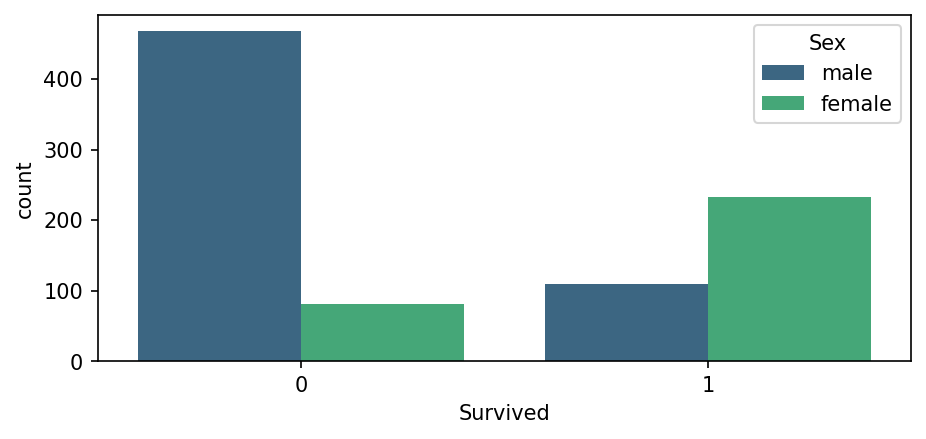

In [3]:
plt.figure(figsize=(7, 3), dpi=150)
sns.countplot(data=df, x='Survived', hue='Sex', palette='viridis')

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df['Embarked'].isna()]
df = df.drop([61, 829], axis=0)

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [11]:
df_obj = df.select_dtypes(include='object')
df_obj

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [12]:
df_obj = pd.get_dummies(df_obj, drop_first=True)
df_obj

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [13]:
df_n = df.select_dtypes(exclude='object')
df_n

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [14]:
final_df = pd.concat([df_n, df_obj], axis=1)
final_df['Fare'].mean()

32.09668087739032

<AxesSubplot: >

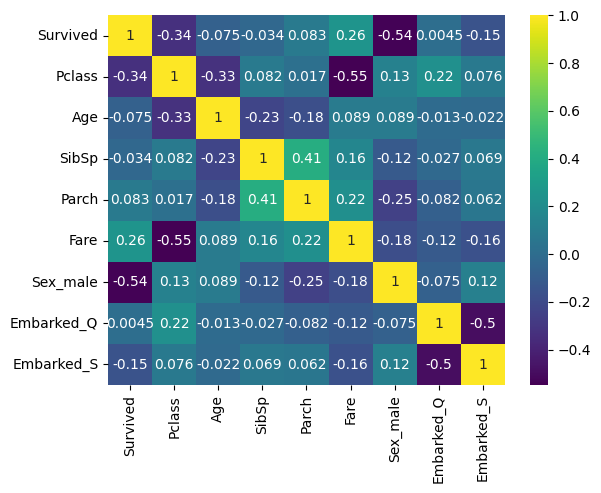

In [15]:
sns.heatmap(final_df.corr(), annot=True, cmap='viridis')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

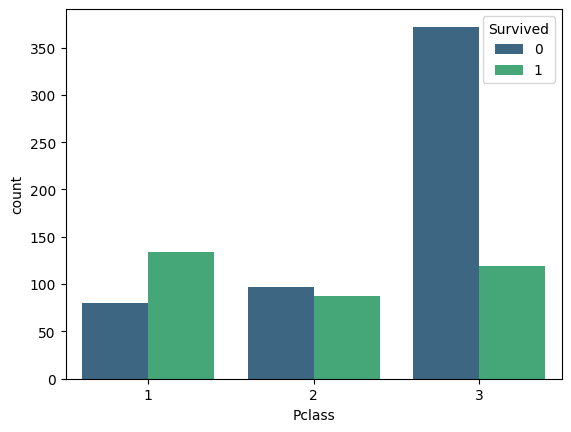

In [16]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')

<AxesSubplot: xlabel='Age', ylabel='Density'>

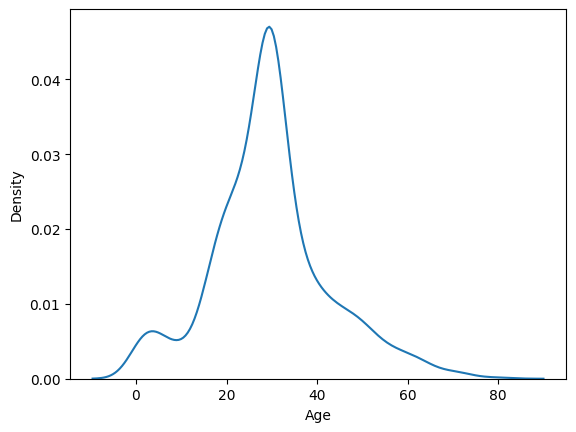

In [17]:
sns.kdeplot(x=df['Age'])

In [18]:
final_df = final_df.astype(float)
X = final_df.drop('Survived', axis=1)
y = final_df['Survived']


# Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
log_model = LogisticRegression(verbose=2, max_iter=10000)

In [23]:
grid_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'none']}
grid_model = GridSearchCV(log_model, param_grid=grid_params, cv=5, scoring='accuracy')

In [24]:
grid_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, verbose=2),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'none']},
             scoring='accuracy')

In [25]:
grid_model.best_estimator_

LogisticRegression(C=0.01, max_iter=10000, verbose=2)

In [26]:
grid_model.best_score_

0.8058800354575002

In [27]:
grid_model.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [28]:
pd.DataFrame(grid_model.cv_results_['mean_test_score'])

,0
0,0.805880
1,0.798867
2,0.798867
3,0.798867
4,0.798867
5,0.798867
6,0.798867
7,0.798867
8,0.798867
9,0.798867


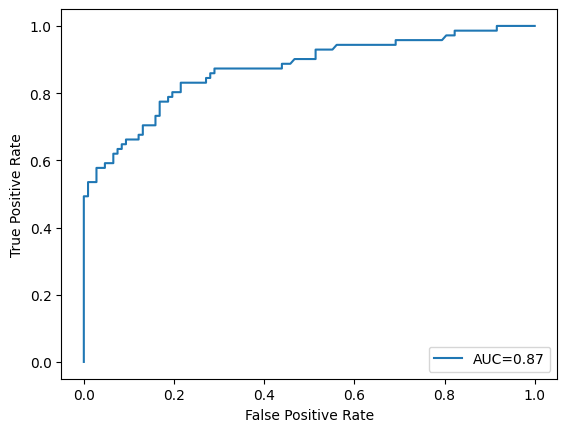

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = grid_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = round(roc_auc_score(y_test, y_pred_proba), 2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Final Test

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = grid_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8033707865168539

In [31]:
confusion_matrix(y_test, y_pred)

array([[101,   6],
       [ 29,  42]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       107
         1.0       0.88      0.59      0.71        71

    accuracy                           0.80       178
   macro avg       0.83      0.77      0.78       178
weighted avg       0.82      0.80      0.79       178



# Using model

In [191]:
from joblib import dump
dump(grid_model, 'titanic_model.joblib')


['titanic_model.joblib']